<a href="https://colab.research.google.com/github/TanyaAgrwal/Machine-learning/blob/main/Prediction_using_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICTION USING UNSUPERVISED ML**

# **SUBMITTED BY- TANYA AGARWAL**

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Iris.csv to Iris (2).csv
User uploaded file "Iris.csv" with length 5107 bytes


In [2]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv(io.StringIO(uploaded['Iris.csv'].decode('utf-8')))
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
x=df.iloc[:,[1,2,3,4]].values
y=df['Species'].values

### **Elbow Method to choose right number of Clusters**.

In [5]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
  model=KMeans(n_clusters=i, init='k-means++',max_iter=300, n_init=10, random_state=0)
  model.fit(x)
  wcss.append(model.inertia_)

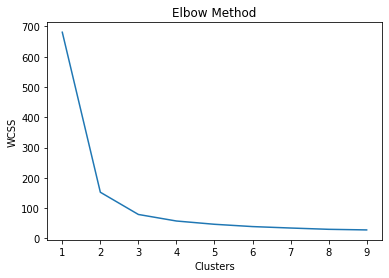

In [6]:
plt.plot(range(1,10), wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300,  n_init=10, random_state=0)
kmeans.fit(x)
y_pred=kmeans.predict(x)

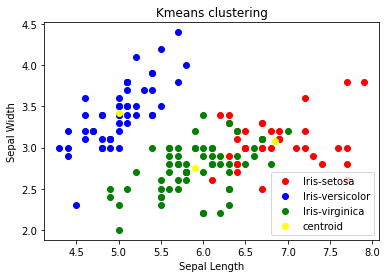

In [8]:
plt.scatter(x[y_pred==0,0], x[y_pred==0,1], c='red', label='Iris-setosa')
plt.scatter(x[y_pred==1,0], x[y_pred==1,1], c='blue', label='Iris-versicolor')
plt.scatter(x[y_pred==2,0], x[y_pred==2,1], c='green', label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='yellow', label='centroid')
plt.legend()
plt.title('Kmeans clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()